In [1]:
#Librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
y_bin = (pd.Series(cancer.target) == 0).astype(int)
df_cancer['y'] = y_bin

df_cancer_sample = df_cancer.sample(n=400, random_state=4713)

In [4]:
print("Distribución de clases (0=benigno, 1=maligno):")
print(df_cancer_sample['y'].value_counts())

Distribución de clases (0=benigno, 1=maligno):
y
0    248
1    152
Name: count, dtype: int64


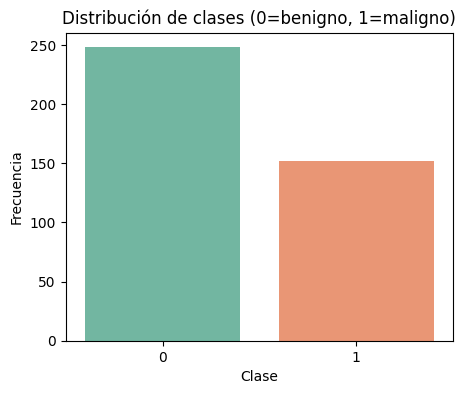

In [5]:


plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df_cancer_sample, hue='y', palette='Set2', legend=False)
plt.title("Distribución de clases (0=benigno, 1=maligno)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

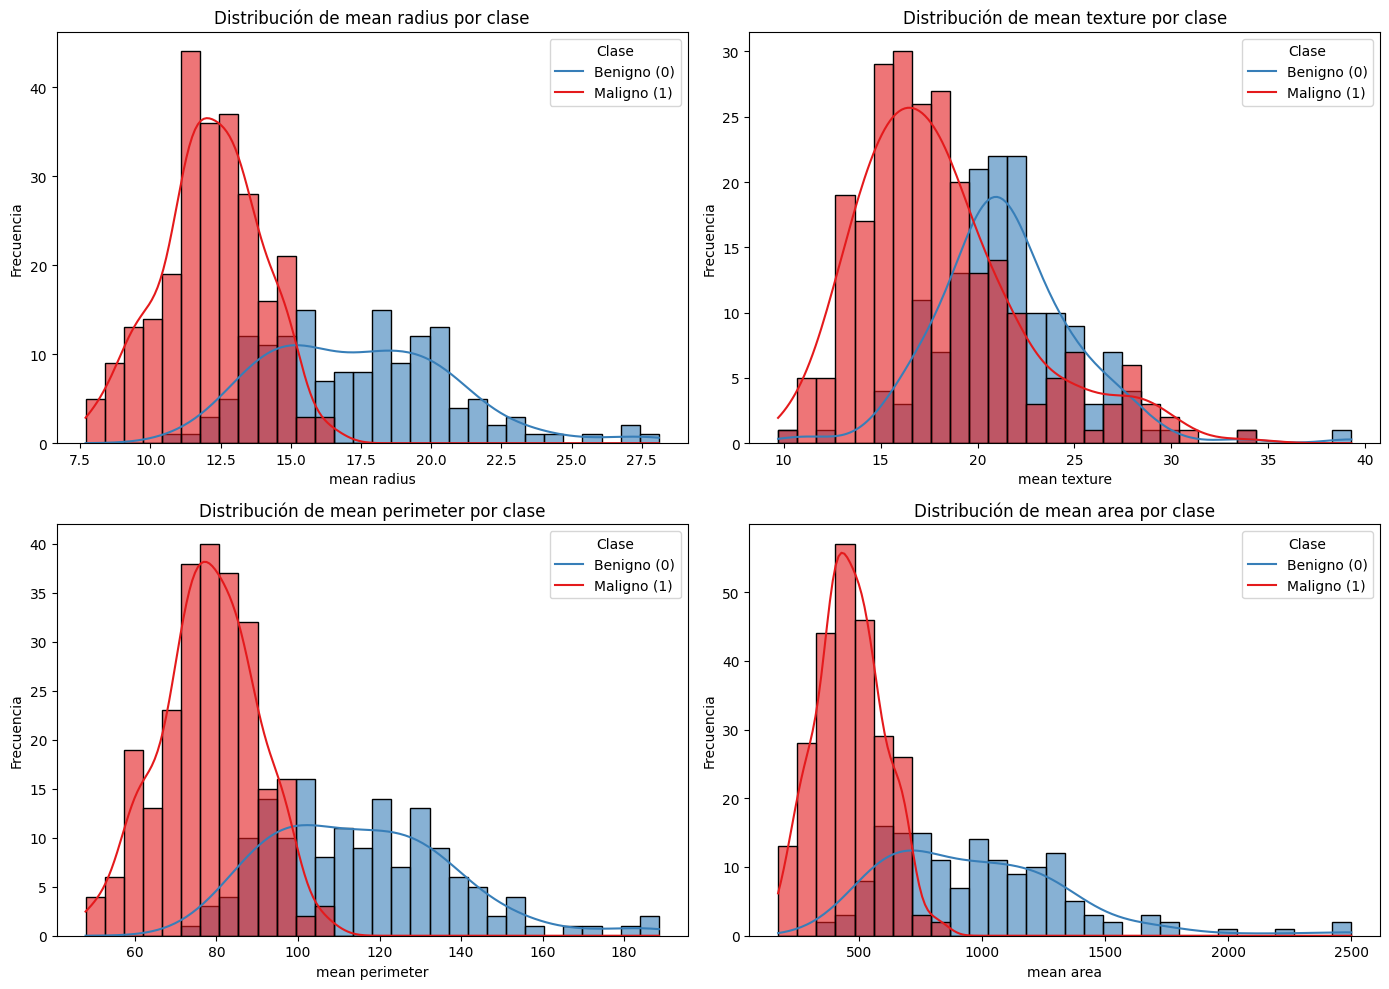

In [6]:
cols_cmp = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 filas, 2 columnas

for i, c in enumerate(cols_cmp):
    ax = axes[i // 2, i % 2]  # posiciona en la grilla
    sns.histplot(
        data=df_cancer_sample,
        x=c,
        hue='y',
        bins=30,
        kde=True,
        palette='Set1',
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"Distribución de {c} por clase")
    ax.set_xlabel(c)
    ax.set_ylabel("Frecuencia")
    ax.legend(title="Clase", labels=["Benigno (0)", "Maligno (1)"])

plt.tight_layout()
plt.show()



In [7]:

cols_sel = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
X_sel = df_cancer_sample[cols_sel].values
y = df_cancer_sample['y'].values

Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.25, random_state=4713, stratify=y
)

Estandarizacion

In [9]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

Ajustar modelos logísticos.

In [10]:

X_train_sm = sm.add_constant(X_train_std, has_constant='add')
logit_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res_logit = logit_model.fit()

print(res_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52.009
Date:                Sat, 06 Sep 2025   Deviance:                       104.02
Time:                        09:06:29   Pearson chi2:                     129.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6252
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9380      0.687      1.365      0.1

In [11]:


coefs = res_logit.params
or_values = np.exp(coefs)

print("Odds Ratios (exp(coef)):")
print(or_values)

Odds Ratios (exp(coef)):
[2.55478503e+00 1.09428678e-18 4.10623408e+00 1.26664053e+15
 1.30921214e+06]


In [12]:
X_test_sm = sm.add_constant(X_test_std, has_constant='add')
y_pred_prob = res_logit.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [13]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Recall (clase 1 = maligno):", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.92
Recall (clase 1 = maligno): 0.9210526315789473
F1-score: 0.8974358974358975


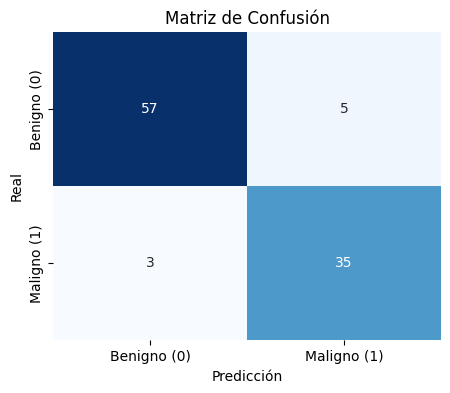

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benigno (0)", "Maligno (1)"],
            yticklabels=["Benigno (0)", "Maligno (1)"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [15]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))


Reporte de clasificación:
               precision    recall  f1-score   support

           0      0.950     0.919     0.934        62
           1      0.875     0.921     0.897        38

    accuracy                          0.920       100
   macro avg      0.912     0.920     0.916       100
weighted avg      0.922     0.920     0.920       100

